In [2]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(10,5)})


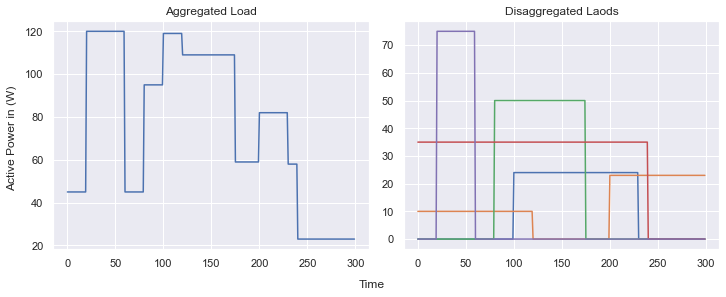

In [3]:
one = np.zeros(300)
one[100:230] = 24
two = np.zeros(300)
two[:120] = 10
two[200:] = 23
three = np.zeros(300)
three[80:175] = 50
four = np.zeros(300)
four[:240] = 35
five = np.zeros(300)
five[20:60] = 75

agg = one + two + three + four + five

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].set_title('Aggregated Load')
axes[1].set_title('Disaggregated Laods')

axes[1].plot(one)
axes[1].plot(two)
axes[1].plot(three)
axes[1].plot(four)
axes[1].plot(five)
axes[0].plot(agg)

fig.text(0.5, -0.01, 'Time', ha='center', va='center')
fig.text(0.0, 0.5, 'Active Power in (W)', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('figures/disaggregate_plot.svg', dpi=300)
plt.show()

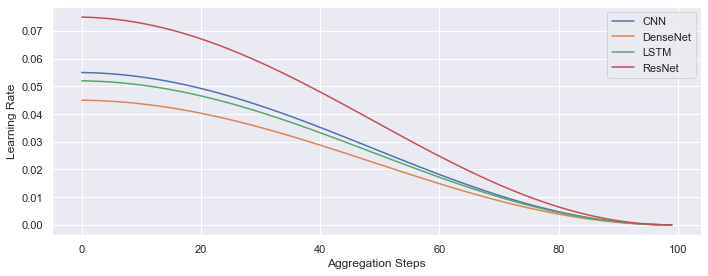

In [11]:
def vis_cosine_annealing(lrs):
    model = torch.nn.Linear(1,1)

    sns.set(rc={'figure.figsize':(15,5)})
    fig, axes = plt.subplots(1, 1, figsize=(10, 4))

    for i in range(4):

        optim = torch.optim.SGD(model.parameters(), lr=lrs[i])
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim ,T_max = 100)
        lr_list = []

        for _ in range(100):
            scheduler.step()
            lr_list.append(optim.param_groups[0]['lr'])

        axes.plot(lr_list)

    axes.set_ylabel('Learning Rate')
    axes.set_xlabel('Aggregation Steps')
    plt.tight_layout()
    plt.legend(['CNN', 'DenseNet', 'LSTM', 'ResNet'])
    plt.savefig(f'figures/cosine_annealing_lr.svg', dpi=300)
    plt.show()

vis_cosine_annealing([0.055, 0.045, 0.052, 0.075])